In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy

nlp = spacy.load('en_core_web_md')

In [2]:
def text_to_dataframe(filename):
    with open(filename, "r") as f:
        data_list = f.readlines()
        count = 0
        data = pd.DataFrame()
        for line in data_list:
            line = line.replace('\n','').split(';')
            data.loc[count, "words"] = line[0]
            data.loc[count, "emotions"] = line[1]
            count += 1
        return data

train_data = text_to_dataframe("data/txt/train.txt" )
test_data = text_to_dataframe("data/txt/test.txt" )
val_data = text_to_dataframe("data/txt/val.txt" )

#### Analytics of Emotions Across All Dataset

**Emotion analysis for the training dataset**

<AxesSubplot:xlabel='emotions', ylabel='count'>

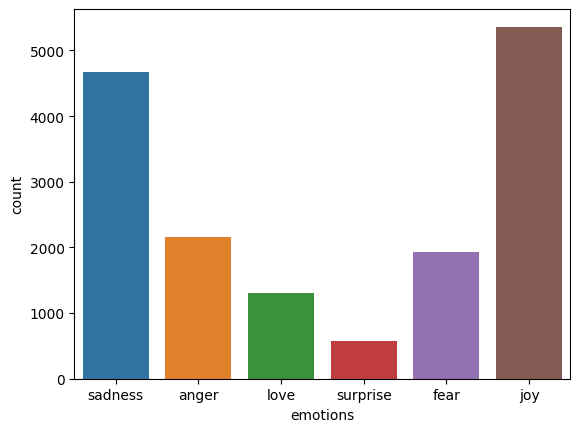

In [3]:
sns.countplot(x="emotions", data=train_data)

**Emotion analysis for the test dataset**

<AxesSubplot:xlabel='emotions', ylabel='count'>

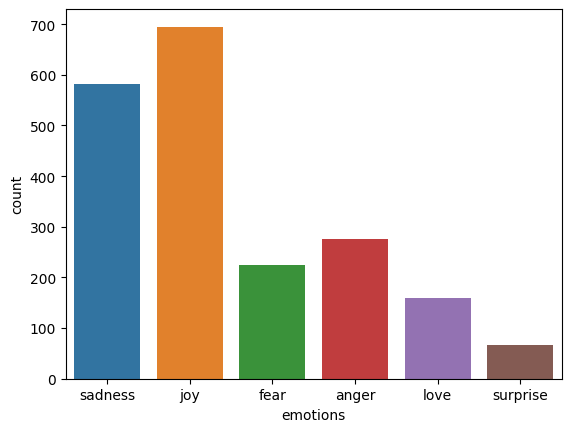

In [4]:
sns.countplot(x="emotions", data=test_data)

**Emotion analysis for the validation dataset**

<AxesSubplot:xlabel='emotions', ylabel='count'>

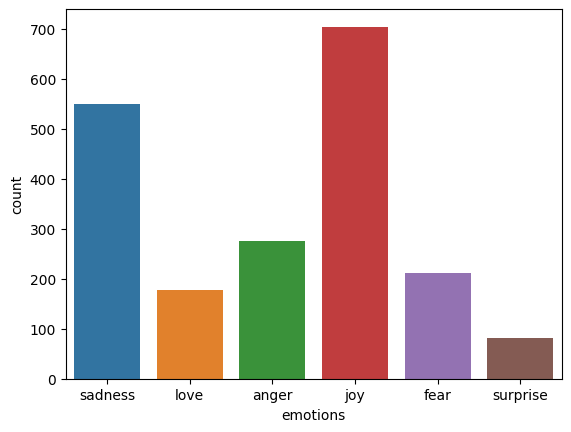

In [5]:
sns.countplot(x="emotions", data=val_data)

**From largest to smallet across all datasets we have:**

1. Joy
2. Sadness
3. Anger
4. Love
5. Fear
6. Suprise

> “You cannot protect yourself from sadness without protecting yourself from happiness.” ― Jonathan Safran Foer

In [6]:
train_data

words emotions
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]

#### Text Preprocessing

In [7]:
import nltk

from textblob import TextBlob
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [8]:
# The datasets have been previously cleaned by conversion to lowercase, removing punctuations and extra whitespaces. 
# I'll just proceed preprocess it further with text correction, removal of stopwords, and lemmatiation. 

def preprocess_data(text):

    # text correction
    text = TextBlob(text)
    text =str(text.correct())

    # removing stopwords
    stopwords_list = stopwords.words("english")
    text = word_tokenize(text)
    text_wo_stopwords = [t for t in text if t not in stopwords_list]

    # lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text_wo_stopwords] 

    text = " ".join(lemmatized_words)

    return text


In [9]:
# Applying preprocessing function

train_data["words"] = train_data["words"].apply(preprocess_data)
test_data["words"] = test_data["words"].apply(preprocess_data)
val_data["words"] = val_data["words"].apply(preprocess_data)

In [10]:
# Categorical Encoding

train_data["emotions"] = train_data["emotions"].replace({"joy" : 0, "sadness" : 1, "anger" : 2, "love" : 3, "fear": 4, "surprise" : 5})
test_data["emotions"] = test_data["emotions"].replace({"joy" : 0, "sadness" : 1, "anger" : 2, "love" : 3, "fear": 4, "surprise" : 5})
val_data["emotions"] = val_data["emotions"].replace({"joy" : 0, "sadness" : 1, "anger" : 2, "love" : 3, "fear": 4, "surprise" : 5})

In [11]:
# Encoding words for proper training

from sentence_transformers import SentenceTransformer
encoder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")


def encode_text(text):
    return np.array([encoder.encode(text)])


train_data["words"] = train_data["words"].apply(encode_text)
test_data["words"] = test_data["words"].apply(encode_text)
val_data["words"] = val_data["words"].apply(encode_text)

c:\Users\PC\Desktop\ML\Q2-Q3-2022\mlops-zoomcamp-capstone-project\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Converting files to parquet.

train_data.to_parquet("data/parquet/train_data.parquet")
test_data.to_parquet("data/parquet/test_data.parquet")
val_data.to_parquet("data/parquet/val_data.parquet")

ArrowInvalid: ('Can only convert 1-dimensional array values', 'Conversion failed for column words with type object')

In [13]:
train_df = pd.read_parquet('data/parquet/train_data.parquet')
test_df = pd.read_parquet('data/parquet/test_data.parquet')
val_df = pd.read_parquet('data/parquet/val_data.parquet')


train_df_vectors = [x for x in train_df["words"]]
train_df_vectors

[array([-3.70367467e-02,  2.56999396e-02,  7.07046613e-02, -1.12584019e-02,
         9.23828408e-02, -6.80132285e-02,  8.25990960e-02,  7.04795346e-02,
         7.77109265e-02, -8.50373358e-02, -6.23117760e-02, -1.60232261e-01,
         2.41410900e-02, -3.71322106e-03, -3.47102769e-02,  4.68590995e-03,
         1.50382111e-03, -2.68653911e-02, -1.20037407e-01, -9.63181164e-03,
         1.76683273e-02, -8.79448652e-03, -6.64707720e-02,  8.75684805e-03,
        -1.42014092e-02,  3.62808295e-02, -1.22756213e-02,  1.39329275e-02,
        -5.98402554e-03,  9.80030000e-03, -4.52248417e-02, -8.43719020e-02,
         4.84635495e-03,  3.09146382e-02, -2.31092200e-02,  4.29023057e-02,
        -5.66136092e-02, -3.12388781e-02,  1.98666169e-03, -1.21611571e-02,
        -9.72711761e-03, -1.74160730e-02,  7.30097853e-03,  1.40734715e-02,
         2.07382012e-02, -9.45645384e-03,  4.18182611e-02,  7.58534595e-02,
        -4.17991243e-02, -8.30690563e-02, -3.95900644e-02,  2.26636045e-02,
         2.5

In [14]:
from sklearn.linear_model import LogisticRegression

LogisticRegression().fit(train_df_vectors, train_df["emotions"])

c:\Users\PC\Desktop\ML\Q2-Q3-2022\mlops-zoomcamp-capstone-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Converting files to parquet.

train_data.to_parquet("data/parquet/train_data.parquet")
test_data.to_parquet("data/parquet/test_data.parquet")
val_data.to_parquet("data/parquet/val_data.parquet")

In [ ]:
# # Import parquent and model encode with bert encoder
